In [22]:
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import mpld3

In [23]:
df_all = pd.read_csv("../data/cases_0_19.csv", index_col = 0)
df_all.tail()

,date,cases_0_9,cases_10_19
185,2022-06-18,641,684
186,2022-06-19,490,520
187,2022-06-20,412,494
188,2022-06-21,691,878
189,2022-06-22,729,942


In [24]:
# convert to datetime64 format to make mpld3 show the axis labels (it won't show them if they're strings)

df_all['date'] = pd.to_datetime(df_all['date'])

In [25]:
# create label columns that will be used as tooltip text for each graph point

df_all['line1_label'] = df_all['date'].astype(str) + ": " + df_all['cases_0_9'].astype(str)
df_all['line2_label'] = df_all['date'].astype(str) + ": " + df_all['cases_10_19'].astype(str)

df_all['line1_label'] = df_all['line1_label'].apply(lambda x: x.replace("2021-", "").replace("2022-", ""))
df_all['line2_label'] = df_all['line2_label'].apply(lambda x: x.replace("2021-", "").replace("2022-", ""))

df_all.head()

,date,cases_0_9,cases_10_19,line1_label,line2_label
0,2021-12-05,51,64,12-05: 51,12-05: 64
1,2021-12-06,42,56,12-06: 42,12-06: 56
2,2021-12-07,36,42,12-07: 36,12-07: 42
3,2021-12-09,51,83,12-09: 51,12-09: 83
4,2021-12-10,68,54,12-10: 68,12-10: 54


### Create mpld3 graph with interactive component

Mouseover triggers tooltips.
Output html doc that can be embedded into any webpage using \<iframe\>.

In [26]:
# allow notebook to show the mpld3 graph inc interactive components, not the static plt graph
mpld3.enable_notebook()

# adjust font size - rcParams is global, so it will change all tick labels and legend, even for the next graph
# must be called before figure is created
plt.rcParams['font.size'] = '12'

# create fig and ax objects - need the ax object for mpld3 plugins to work
# don't really need subplots - this is just how mpld3's own examples create fig and ax
fig, ax = plt.subplots()

# plot both age ranges on same axes
line1 = ax.plot(df_all['date'], df_all['cases_0_9'], linestyle='solid', marker='o', label='Age range 0-9')
line2 = ax.plot(df_all['date'], df_all['cases_10_19'], linestyle='solid', marker='o', label='Age range 10-19')

# make figure larger
fig.set_size_inches(10, 5)

# ensure y = 0 is at origin, not above it
plt.ylim(ymin=0)

# add legend
plt.legend(loc = 'upper left')

# remove extra whitespace around graph
plt.tight_layout()

# add tooltip plugin for each series
# each tooltip plugin needs a Line2D object (containing all points on the line) and a list of labels
tooltip1 = mpld3.plugins.PointLabelTooltip(line1[0], df_all['line1_label'].values.tolist())
tooltip2 = mpld3.plugins.PointLabelTooltip(line2[0], df_all['line2_label'].values.tolist())
mpld3.plugins.connect(fig, tooltip1, tooltip2)

# save as html - can be embedded into any webpage using <iframe>
mpld3.save_html(fig, "../graphs/cases_0_19.html")
mpld3.display(fig)

### Create plt graph and static svg
plt and mpld3 treat the axes differently - the settings for plt don't look right with mpld3 and vice-versa. So I'm doing them separately to make them look right. One graph interactive, the other static.

In [27]:
# reformat dates to show "month day", but not year
# this puts them back into a string (object) format

df_all['date'] = df_all['date'].dt.strftime("%b %d")

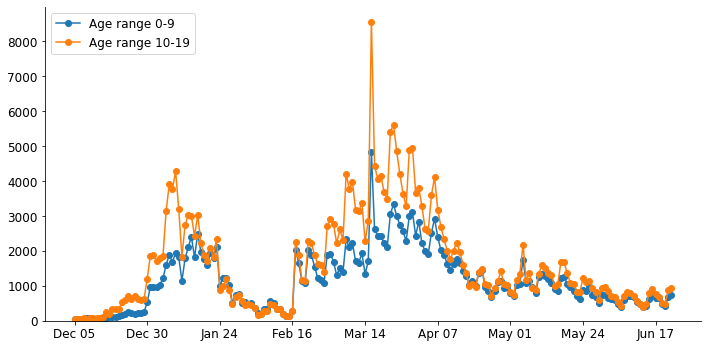

In [28]:
# disable mpld3 display in notebook, so only plt graph is shown below
mpld3.disable_notebook()

# create new fig and ax to overwrite existing ones
# don't really need subplots - this is just how I'm creating the fig and ax
fig, ax = plt.subplots()

# plot both age ranges on same axes
line1 = plt.plot(df_all['date'], df_all['cases_0_9'], linestyle='solid', marker='o', label='Age range 0-9')
line2 = plt.plot(df_all['date'], df_all['cases_10_19'], linestyle='solid', marker='o', label='Age range 10-19')

# make figure larger
fig.set_size_inches(10, 5)

# ensure y = 0 is at origin, not above it
plt.ylim(ymin=0)

# add legend
plt.legend(loc = 'upper left')

# set xtick locations to prevent crowding of x-axis labels and also unevenly spaced ticks
# 1. set step size by dividing num rows by arbitrary number (I decided that 8 looks good for the size of graph)
# 2. step through the rows by step size, adding row locations (i.e. indices) to a list
# 3. only the dates corresponding to those locations will appear on the graph

xtick_locations = []
xtick_labels = []
num_rows = df_all.shape[0]
xtick_step = num_rows//8

position = 0
while (position < num_rows):
    
    xtick_locations.append(position)
    #xtick_labels.append(df_all.iloc[position]['date'])
    position = position + xtick_step

plt.xticks(xtick_locations, fontsize = 12)

# remove extra whitespace around graph
plt.tight_layout()

# remove top and right borders aka spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("../graphs/cases_0_19.svg")
plt.show()